# Criando algoritmos de classificação para as partidas do Arthur Lanches se foram vitórias ou derrotas

## Utilizando os insights passados de EDA_Matches.ipynb podemos ter uma ideia de como melhorar os dados

## Pré processamento dos dados

In [54]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,cross_val_score 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../Arthur_lanches_games_CSVs/LoadDataSetArthurLanches.csv')
df.head()

,matchId,queueId,gameDuration,summonerName,teamId,championName,kills,deaths,assists,kda,totalMinionsKilled,totalDamageTaken,totalDamageDealtToChampions,goldEarned,visionScore,summoner1Id,summoner2Id,firstTowerKill,firstBloodAssist,firstBloodKill,champExperience,doubleKills,tripleKills,quadraKills,pentaKills,win,gameDurationMin,gameStartTime
0,BR1_3066283114,420,1696,NaN,0,Teemo,6,7,9,2.14,191,23235,35433,11604,12,4,14,False,False,False,15186,1,0,0,0,False,28.3,2025-02-13 21:02:46.908
1,BR1_3066260304,420,1484,NaN,0,Teemo,6,2,8,7.00,168,13447,20489,10445,13,4,14,False,False,False,15123,0,0,0,0,True,24.7,2025-02-13 19:54:01.545
2,BR1_3066246152,420,1969,NaN,0,Teemo,5,4,11,4.00,188,21229,24675,13007,23,4,14,False,True,False,16909,0,0,0,0,True,32.8,2025-02-13 19:08:13.973
3,BR1_3066231574,420,1409,NaN,1,Teemo,0,5,5,1.00,208,20639,16903,8170,10,4,14,False,False,False,12355,0,0,0,0,False,23.5,2025-02-13 18:23:59.796
4,BR1_3065897622,420,1760,NaN,0,Teemo,3,8,7,1.25,158,23994,28200,9403,15,4,14,False,False,False,12672,0,0,0,0,False,29.3,2025-02-12 18:45:03.944


In [3]:
df.shape

(200, 28)

In [4]:
df.describe()

,queueId,gameDuration,teamId,kills,deaths,assists,kda,totalMinionsKilled,totalDamageTaken,totalDamageDealtToChampions,goldEarned,visionScore,summoner1Id,summoner2Id,champExperience,doubleKills,tripleKills,quadraKills,pentaKills,gameDurationMin
count,200.0,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000
mean,420.0,1666.770000,0.49500,5.600000,3.430000,6.960000,5.159750,189.85500,19733.000000,26198.305000,11491.265000,18.470000,4.120000,13.370000,14930.725000,0.405000,0.045000,0.005000,0.0,27.777500
std,0.0,452.262472,0.50123,3.440813,2.440261,4.827517,4.368189,56.05394,10906.197149,14870.823452,3587.744108,10.155529,0.476166,1.843936,4703.525421,0.650454,0.230741,0.070711,0.0,7.539734
min,420.0,559.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.00000,3064.000000,3939.000000,2803.000000,3.000000,4.000000,6.000000,3969.000000,0.000000,0.000000,0.000000,0.0,9.300000
25%,420.0,1414.500000,0.00000,3.000000,2.000000,3.000000,2.230000,161.75000,12521.750000,16228.750000,9198.500000,12.000000,4.000000,14.000000,12015.500000,0.000000,0.000000,0.000000,0.0,23.600000
50%,420.0,1651.000000,0.00000,5.000000,3.000000,6.000000,4.000000,195.00000,18115.000000,23432.500000,11368.000000,17.000000,4.000000,14.000000,15020.000000,0.000000,0.000000,0.000000,0.0,27.500000
75%,420.0,1916.250000,1.00000,8.000000,5.000000,9.000000,7.000000,220.25000,24708.750000,33390.000000,13403.750000,23.000000,4.000000,14.000000,17495.000000,1.000000,0.000000,0.000000,0.0,31.975000
max,420.0,3628.000000,1.00000,18.000000,13.000000,24.000000,25.000000,395.00000,83843.000000,99908.000000,25737.000000,105.000000,6.000000,21.000000,37470.000000,3.000000,2.000000,1.000000,0.0,60.500000


In [ ]:
for colun in df.columns:
    print(df[colun].value_counts())
    print('\n\n')

matchId
BR1_3059670987    2
BR1_3066260304    1
BR1_3066283114    1
BR1_3066231574    1
BR1_3065897622    1
                 ..
BR1_3050898865    1
BR1_3050873147    1
BR1_3050851549    1
BR1_3050840161    1
BR1_3050822136    1
Name: count, Length: 199, dtype: int64



queueId
420    200
Name: count, dtype: int64



gameDuration
1779    2
1781    2
1138    2
1579    2
912     2
       ..
1553    1
2424    1
2260    1
956     1
2021    1
Name: count, Length: 187, dtype: int64



summonerName
Arthur Lanches    160
Name: count, dtype: int64



teamId
0    101
1     99
Name: count, dtype: int64



championName
Teemo        165
Ornn          14
Varus          5
Kennen         5
Malphite       2
Nami           1
Quinn          1
Leona          1
Karma          1
Gnar           1
JarvanIV       1
Orianna        1
TahmKench      1
Skarner        1
Name: count, dtype: int64



kills
5     31
6     24
2     22
4     20
3     18
1     16
8     13
7     12
9     12
10     8
11     7
12     5
0    

In [ ]:
#queueId, summonerName, matchId, pentaKills, gameStartTime sao colunas que não teram relevância para o modelo

In [9]:
df.drop(columns=['queueId', 'summonerName', 'matchId', 'pentaKills', 'gameStartTime'], inplace=True)

In [13]:
df = df.drop_duplicates().reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gameDuration                 199 non-null    int64  
 1   teamId                       199 non-null    int64  
 2   championName                 199 non-null    object 
 3   kills                        199 non-null    int64  
 4   deaths                       199 non-null    int64  
 5   assists                      199 non-null    int64  
 6   kda                          199 non-null    float64
 7   totalMinionsKilled           199 non-null    int64  
 8   totalDamageTaken             199 non-null    int64  
 9   totalDamageDealtToChampions  199 non-null    int64  
 10  goldEarned                   199 non-null    int64  
 11  visionScore                  199 non-null    int64  
 12  summoner1Id                  199 non-null    int64  
 13  summoner2Id         

In [21]:
# aplicando label encoder na coluna categorica, pois há muitos tipos de dados diferntes
le = LabelEncoder()
df['championNameEncoded'] = le.fit_transform(df['championName'])

In [22]:
# Mostrando o que cada valor virou
dict(zip(le.classes_,le.transform(le.classes_)))

{'Gnar': np.int64(0),
 'JarvanIV': np.int64(1),
 'Karma': np.int64(2),
 'Kennen': np.int64(3),
 'Leona': np.int64(4),
 'Malphite': np.int64(5),
 'Nami': np.int64(6),
 'Orianna': np.int64(7),
 'Ornn': np.int64(8),
 'Quinn': np.int64(9),
 'Skarner': np.int64(10),
 'TahmKench': np.int64(11),
 'Teemo': np.int64(12),
 'Varus': np.int64(13)}

In [24]:
df.columns
df.drop(columns={'championName'},inplace=True)
# com as variáveis todas numericas, posso começar a aplicar o modelo de machine para prever o resultado das partidas

## TREINAMENTO DO MODELO COM MODELO DE DECISION TREE (INICIAL E MAIS SIMPLES)
## Utilizarei os valores como um Baseline a ser quebrado

In [28]:
target = 'win'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

dt = DecisionTreeClassifier(random_state=23)
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[None,2,3,4,5,10],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,3]
}

grid = GridSearchCV(dt, param_grid, cv = 5, n_jobs=1, scoring='accuracy')
grid.fit(X_train,y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

acuracia_dt = accuracy_score(y_test,y_pred)

print("Melhores parametros para o Grid")
print(grid.best_params_)

print("\n Resultados da Classificação:")
print(classification_report(y_test,y_pred))

print("\n Acurácia:")
print(acuracia_dt)

Melhores parametros para o Grid
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

 Resultados da Classificação:
              precision    recall  f1-score   support

       False       0.59      0.67      0.62        15
        True       0.78      0.72      0.75        25

    accuracy                           0.70        40
   macro avg       0.69      0.69      0.69        40
weighted avg       0.71      0.70      0.70        40


 Acurácia:
0.7


## Testando diversos modelos e técnicas para ultrapassar a acurácia de 70% do modelo de DecisionTree

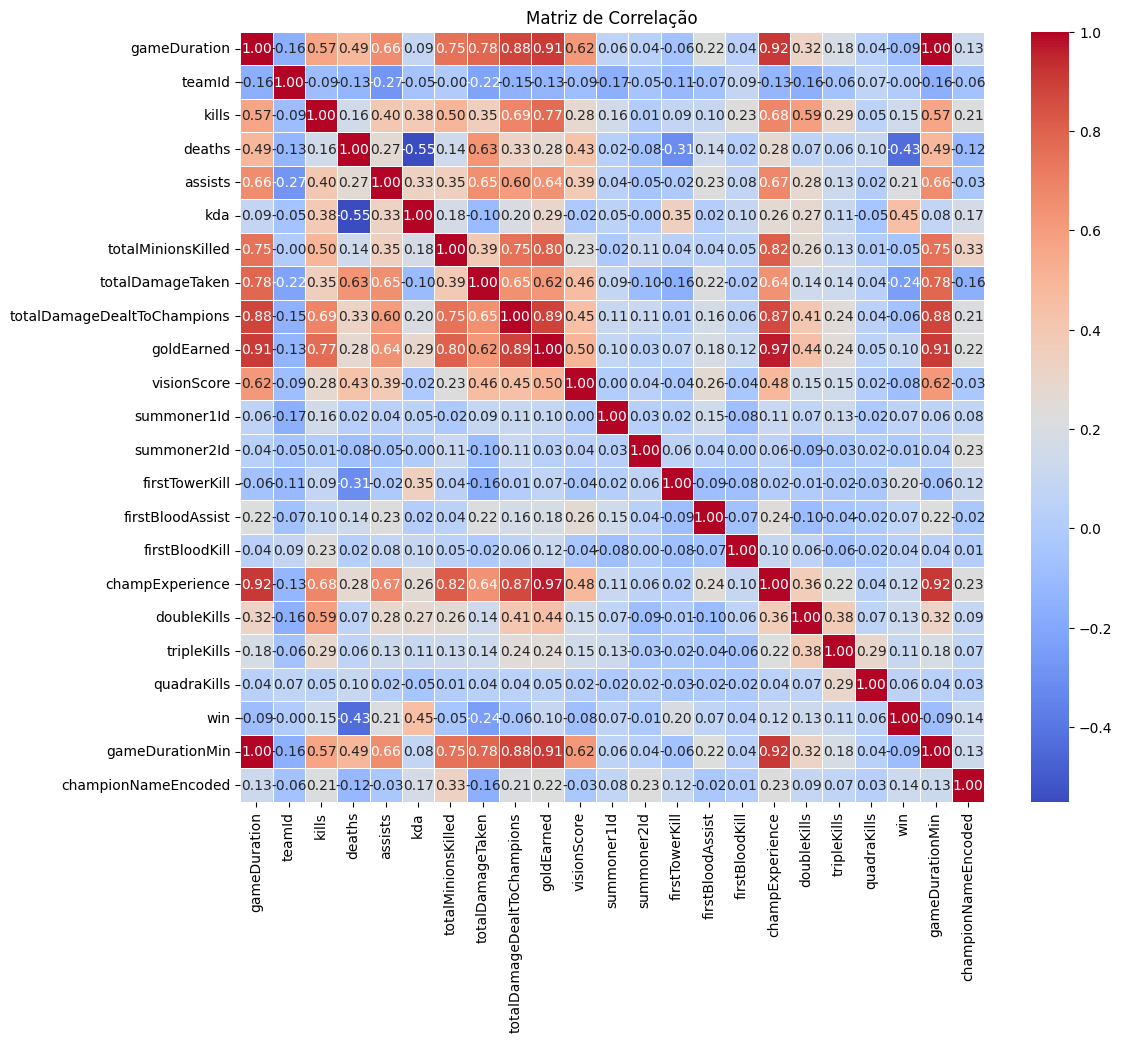

In [ ]:
correlacao = df.corr()
plt.figure(figsize=(12, 10))  
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlação")
plt.show()

In [ ]:
# Criando uma variavel para as colunas com correlação com 'win' maior que um valor ou menor que outro valor
maior_menor = (correlacao['win'] > 0.20) | (correlacao['win'] < -0.20)

# Selecionando os nomes das colunas que atendem ao critério
colunas_filtradas = correlacao.index[maior_menor]

print("Colunas filtradas:", list(colunas_filtradas))

Colunas filtradas: ['deaths', 'assists', 'kda', 'totalDamageTaken', 'win']


In [36]:
df[['kills', 'deaths', 'assists', 'kda', 'totalDamageTaken', 'firstTowerKill', 'champExperience', 'doubleKills', 'tripleKills', 'win', 'championNameEncoded']]

,kills,deaths,assists,kda,totalDamageTaken,firstTowerKill,champExperience,doubleKills,tripleKills,win,championNameEncoded
0,6,7,9,2.14,23235,False,15186,1,0,False,12
1,6,2,8,7.00,13447,False,15123,0,0,True,12
2,5,4,11,4.00,21229,False,16909,0,0,True,12
3,0,5,5,1.00,20639,False,12355,0,0,False,12
4,3,8,7,1.25,23994,False,12672,0,0,False,12
...,...,...,...,...,...,...,...,...,...,...,...
194,6,4,5,2.75,15254,False,12525,0,0,False,12
195,12,6,4,2.67,26288,False,20557,2,0,True,13
196,7,3,9,5.33,28374,False,21456,0,0,False,12
197,5,0,3,8.00,6645,False,9000,0,0,True,12


## Testando o XGB para superar a acurácia do modelo de DecisionTree

In [ ]:
target = 'win'
X = df[['assists', 'kda', 'totalDamageTaken', 'championNameEncoded']]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=23)

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}


grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, n_jobs=1, scoring='accuracy')

grid_xgb.fit(X_train, y_train)

best_model_xgb = grid_xgb.best_estimator_

y_pred_xgb = best_model_xgb.predict(X_test)

acuracia_xgb = accuracy_score(y_test, y_pred_xgb)

print("Melhores parâmetros para o Grid:")
print(grid_xgb.best_params_)

print("\nResultados da Classificação:")
print(classification_report(y_test, y_pred_xgb))

print("\nAcurácia:")
print(acuracia_xgb)


Melhores parâmetros para o Grid:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Resultados da Classificação:
              precision    recall  f1-score   support

       False       0.80      0.80      0.80        15
        True       0.88      0.88      0.88        25

    accuracy                           0.85        40
   macro avg       0.84      0.84      0.84        40
weighted avg       0.85      0.85      0.85        40


Acurácia:
0.85


## Testando com RandomForest para tentar quebrar o Baseline e ver como se comporta em relação ao XGB

In [69]:
target = 'win'
X = df[['assists', 'kda', 'totalDamageTaken', 'championNameEncoded']]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

rf_model = RandomForestClassifier(random_state=23)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=1, scoring='accuracy')

grid_rf.fit(X_train, y_train)

best_model_rf = grid_rf.best_estimator_

y_pred_rf = best_model_rf.predict(X_test)

acuracia_rf = accuracy_score(y_test, y_pred_rf)

print("Melhores parâmetros para o Grid:")
print(grid_rf.best_params_)

print("\nResultados da Classificação:")
print(classification_report(y_test, y_pred_rf))

print("\nAcurácia:")
print(acuracia_rf)

Melhores parâmetros para o Grid:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

Resultados da Classificação:
              precision    recall  f1-score   support

       False       0.86      0.80      0.83        15
        True       0.88      0.92      0.90        25

    accuracy                           0.88        40
   macro avg       0.87      0.86      0.86        40
weighted avg       0.87      0.88      0.87        40


Acurácia:
0.875


## Tentando melhorar a acurácia com validação cruzada

In [72]:
target = 'win'
X = df[['assists', 'kda', 'totalDamageTaken', 'championNameEncoded']]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y
)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=23)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    xgb, param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)
grid.fit(X_train, y_train)
best_xgb = grid.best_estimator_

print("Melhores parâmetros (GridSearch):", grid.best_params_)

y_pred = best_xgb.predict(X_test)
print("\nRelatório no hold‑out:")
print(classification_report(y_test, y_pred))
print("Acurácia hold‑out:", accuracy_score(y_test, y_pred))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
scores = cross_val_score(
    best_xgb, X, y,
    cv=cv, scoring='accuracy', n_jobs=-1
)

print("\nAcurácia:", scores)
print("Média:", scores.mean(), "+ / -", scores.std())

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/usuario/Documentos/riot_project_ds/riot_project_venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:21:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/usuario/Documentos/riot_project_ds/riot_project_venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:21:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/usuario/Documentos/riot_project_ds/riot_project_venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:21:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/usuario/Documentos/riot_project_ds/riot_project_venv/lib/python3.12/site-packages/xgboost/training.

Melhores parâmetros (GridSearch): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Relatório no hold‑out:
              precision    recall  f1-score   support

       False       0.80      0.80      0.80        15
        True       0.88      0.88      0.88        25

    accuracy                           0.85        40
   macro avg       0.84      0.84      0.84        40
weighted avg       0.85      0.85      0.85        40

Acurácia hold‑out: 0.85


/Users/usuario/Documentos/riot_project_ds/riot_project_venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:21:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/usuario/Documentos/riot_project_ds/riot_project_venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:21:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/usuario/Documentos/riot_project_ds/riot_project_venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:21:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/usuario/Documentos/riot_project_ds/riot_project_venv/lib/python3.12/site-packages/xgboost/training.


Acurácia: [0.8        0.775      0.775      0.825      0.69230769]
Média: 0.7734615384615384 + / - 0.04461206884230469


# RESUMO : 
- O modelo base atingiu 75% de acurácia utilizando uma árvore de decisão.
- Para superar o modelo, utilizei algumas técnicas como validação cruzada, grid search e fui filtrando as features e rodando para achar a melhor combinação.
- No fim os resultados não ultrapassaram os 87.5% de acurácia, tanto no modelo utilizando o XGB quanto o RandomForest
- Embora não superei os valores de 87.5%, consegui fazer um valor de acurácia maior do que o baseline, logo, nosso modelo está muito bom para os padrões.